In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('dataset.csv')

print(f"Dataset size: {df.shape}")

print(df.head())


Dataset size: (32581, 12)
   person_age   person_income  personhomeownership  personemplength  \
0          22           59000                 RENT            123.0   
1          21            9600                  OWN              5.0   
2          25            9600             MORTGAGE              1.0   
3          23           65500                 RENT              4.0   
4          24           54400                 RENT              8.0   

   loan_intent  loan_grade   loan_amnt  loanintrate   loan_status  \
0     PERSONAL           D       35000        16.02             1   
1    EDUCATION           B        1000        11.14             0   
2      MEDICAL           C        5500        12.87             1   
3      MEDICAL           C       35000        15.23             1   
4      MEDICAL           C       35000        14.27             1   

    loanpercentincome  cbpersondefaultonfile   cbpresoncredhistlength  
0                0.59                      Y                

In [4]:
# null
df.dropna(inplace=True)
# missing value
print(df.isnull().sum())

person_age                 0
 person_income             0
 personhomeownership       0
 personemplength           0
 loan_intent               0
 loan_grade                0
 loan_amnt                 0
 loanintrate               0
 loan_status               0
 loanpercentincome         0
 cbpersondefaultonfile     0
 cbpresoncredhistlength    0
dtype: int64


In [5]:
print(df.describe())  


         person_age   person_income     loan_amnt   loan_status  \
count  32581.000000    3.258100e+04  32581.000000  32581.000000   
mean      27.734600    6.607485e+04   9589.371106      0.218164   
std        6.348078    6.198312e+04   6322.086646      0.413006   
min       20.000000    4.000000e+03    500.000000      0.000000   
25%       23.000000    3.850000e+04   5000.000000      0.000000   
50%       26.000000    5.500000e+04   8000.000000      0.000000   
75%       30.000000    7.920000e+04  12200.000000      0.000000   
max      144.000000    6.000000e+06  35000.000000      1.000000   

        loanpercentincome   cbpresoncredhistlength  
count        32581.000000             32581.000000  
mean             0.170203                 5.804211  
std              0.106782                 4.055001  
min              0.000000                 2.000000  
25%              0.090000                 3.000000  
50%              0.150000                 4.000000  
75%              0.230000

In [6]:
print(df.columns.tolist())

['person_age', ' person_income', ' personhomeownership', ' personemplength', ' loan_intent', ' loan_grade', ' loan_amnt', ' loanintrate', ' loan_status', ' loanpercentincome', ' cbpersondefaultonfile', ' cbpresoncredhistlength']


In [7]:
df.columns = df.columns.str.strip()
print(df['personemplength'].unique())
print(df['loanintrate'].unique())

['123.0' '5.0' '1.0' '4.0' '8.0' '2.0' '6.0' '7.0' '0.0' '9.0' '3.0'
 '10.0' '?' '11.0' '18.0' '12.0' '17.0' '14.0' '16.0' '13.0' '19.0' '15.0'
 '20.0' '22.0' '21.0' '24.0' '23.0' '26.0' '25.0' '27.0' '28.0' '31.0'
 '41.0' '34.0' '29.0' '38.0' '30.0']
['16.02' '11.14' '12.87' '15.23' '14.27' '7.14' '12.42' '11.11' '8.9'
 '14.74' '10.37' '8.63' '7.9' '18.39' '10.65' '20.25' '18.25' '10.99'
 '7.49' '16.77' '17.58' '7.29' '14.54' '12.68' '17.74' '9.32' '9.99'
 '12.84' '11.12' '6.62' '14.17' '13.85' '13.49' '7.51' '16.89' '?' '17.99'
 '12.69' '7.88' '19.41' '10.38' '15.33' '16.45' '18.62' '15.96' '11.48'
 '5.99' '11.58' '15.7' '15.99' '14.84' '14.42' '6.99' '13.61' '9.91'
 '13.48' '12.98' '13.57' '15.68' '13.06' '15.62' '11.71' '8.88' '12.18'
 '13.99' '5.42' '12.73' '11.49' '19.91' '11.83' '14.59' '9.64' '16.35'
 '18.67' '10.08' '10.36' '12.23' '16.07' '14.22' '14.79' '13.22' '11.86'
 '13.43' '15.28' '17.93' '9.25' '10.62' '18.43' '11.36' '15.65' '13.04'
 '17.04' '14.83' '14.65' '16.82' '1

In [8]:
# replace ? with null

df['loanintrate'] = df['loanintrate'].replace('?', np.nan)

df['loanintrate'] = pd.to_numeric(df['loanintrate'], errors='coerce')

df['personemplength'] = df['personemplength'].replace('?', np.nan)

df['personemplength'] = pd.to_numeric(df['personemplength'], errors='coerce')

In [9]:
# remove rows with personemplength > 60

df = df[df['personemplength'] <= 60]

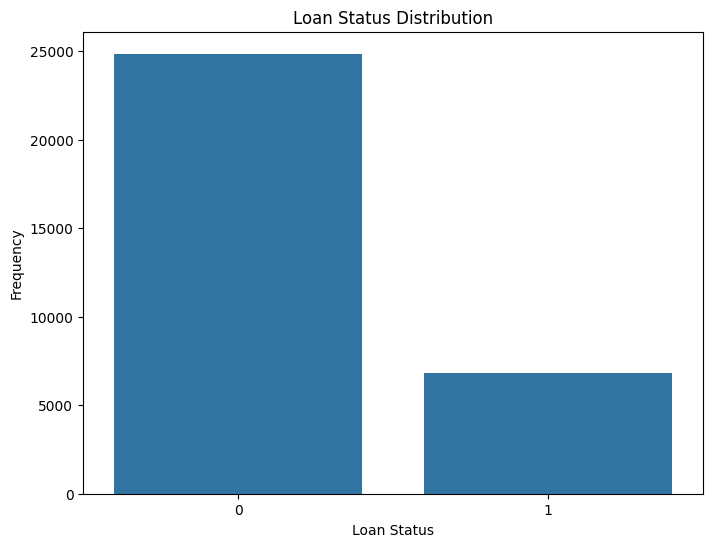

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['0', '1'])
plt.show()

In [11]:
df.head()

,person_age,person_income,personhomeownership,personemplength,loan_intent,loan_grade,loan_amnt,loanintrate,loan_status,loanpercentincome,cbpersondefaultonfile,cbpresoncredhistlength
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


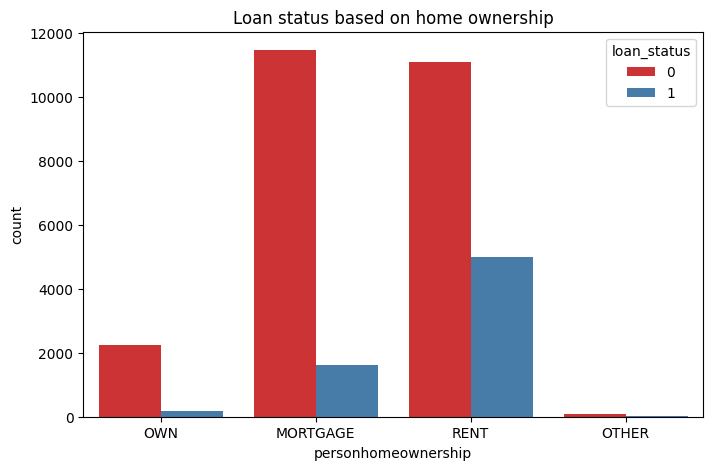

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="personhomeownership", hue="loan_status", palette="Set1")
plt.title("Loan status based on home ownership")
plt.show()



C:\Users\aysem\AppData\Local\Temp\ipykernel_17804\1997613678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="loan_intent", y="loan_amnt", palette="coolwarm")


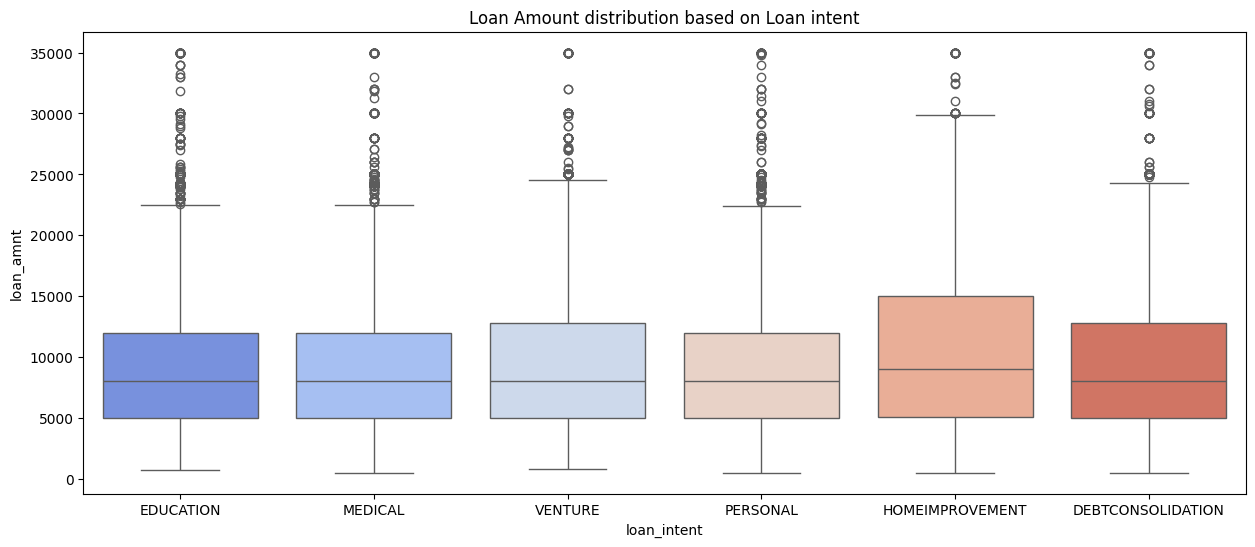

C:\Users\aysem\AppData\Local\Temp\ipykernel_17804\1997613678.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="loan_intent", y="loanintrate", palette="viridis")


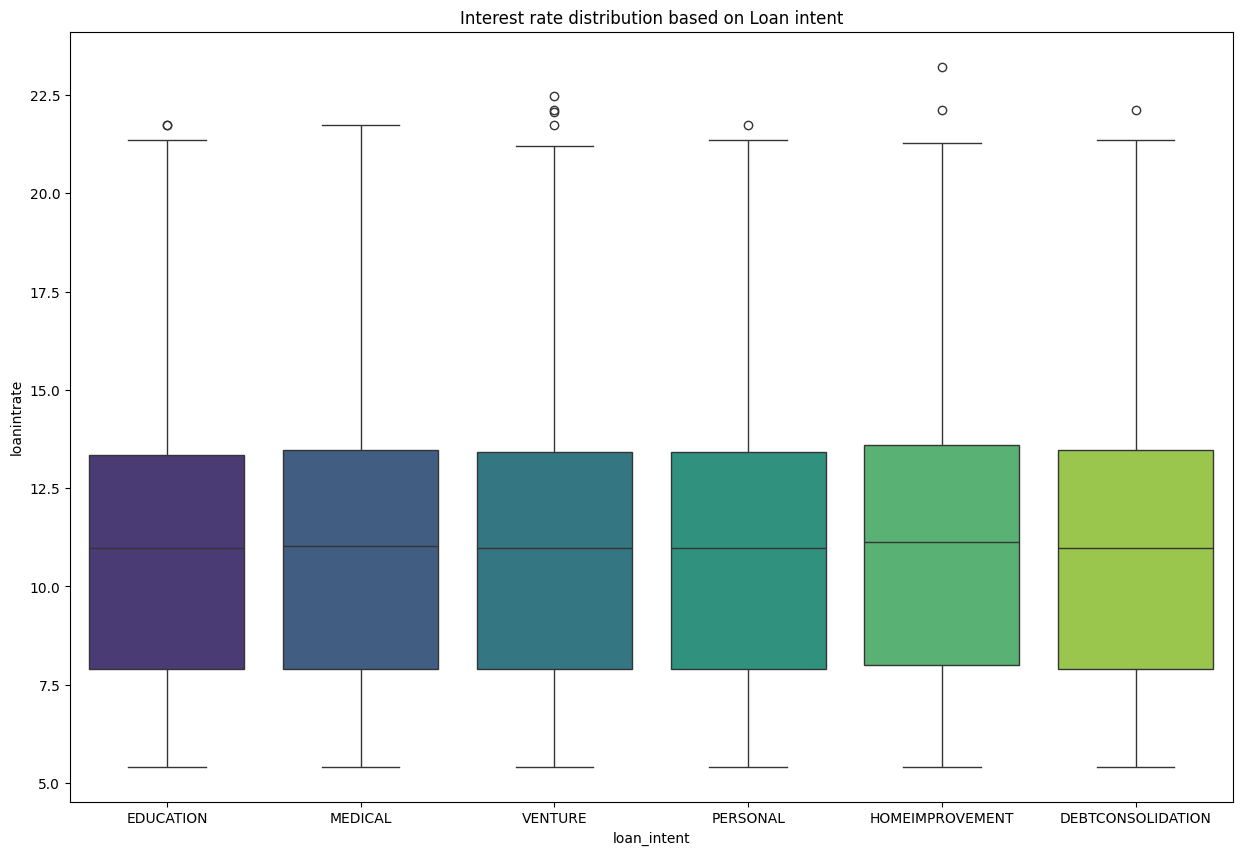

In [13]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x="loan_intent", y="loan_amnt", palette="coolwarm")
plt.title("Loan Amount distribution based on Loan intent")
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="loan_intent", y="loanintrate", palette="viridis")
plt.title("Interest rate distribution based on Loan intent")
plt.show()


C:\Users\aysem\AppData\Local\Temp\ipykernel_17804\2490799193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="loan_grade", y="loanintrate", palette="magma")


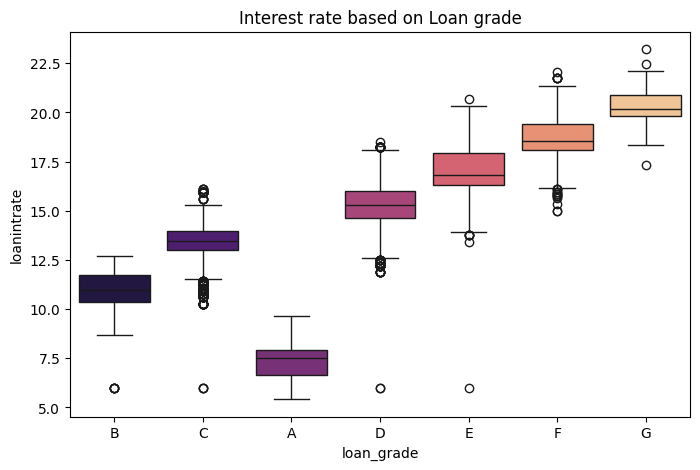

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="loan_grade", y="loanintrate", palette="magma")
plt.title("Interest rate based on Loan grade")
plt.show()


C:\Users\aysem\AppData\Local\Temp\ipykernel_17804\1376594367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="personhomeownership", y="person_income", palette="Accent")


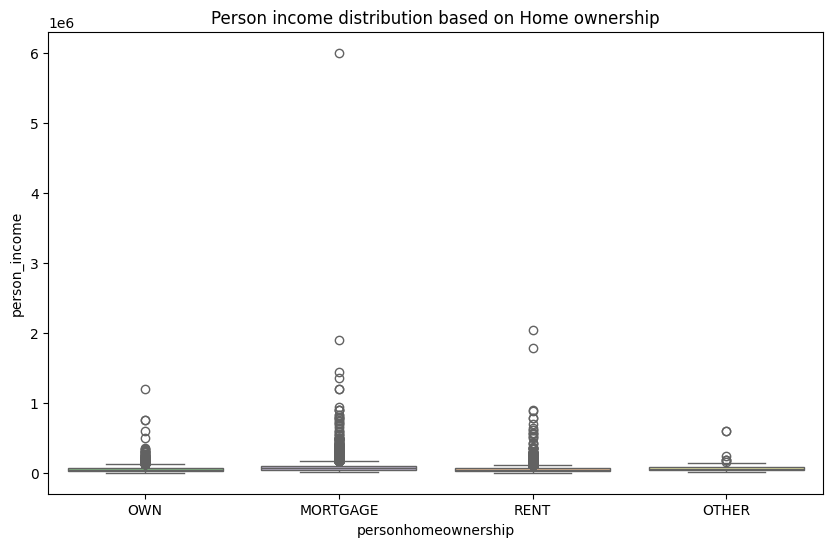

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="personhomeownership", y="person_income", palette="Accent")
plt.title("Person income distribution based on Home ownership")
plt.show()



C:\Users\aysem\AppData\Local\Temp\ipykernel_17804\3916949866.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="personemplength", y="loan_status", ci=None, palette="Set3")
C:\Users\aysem\AppData\Local\Temp\ipykernel_17804\3916949866.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="personemplength", y="loan_status", ci=None, palette="Set3")


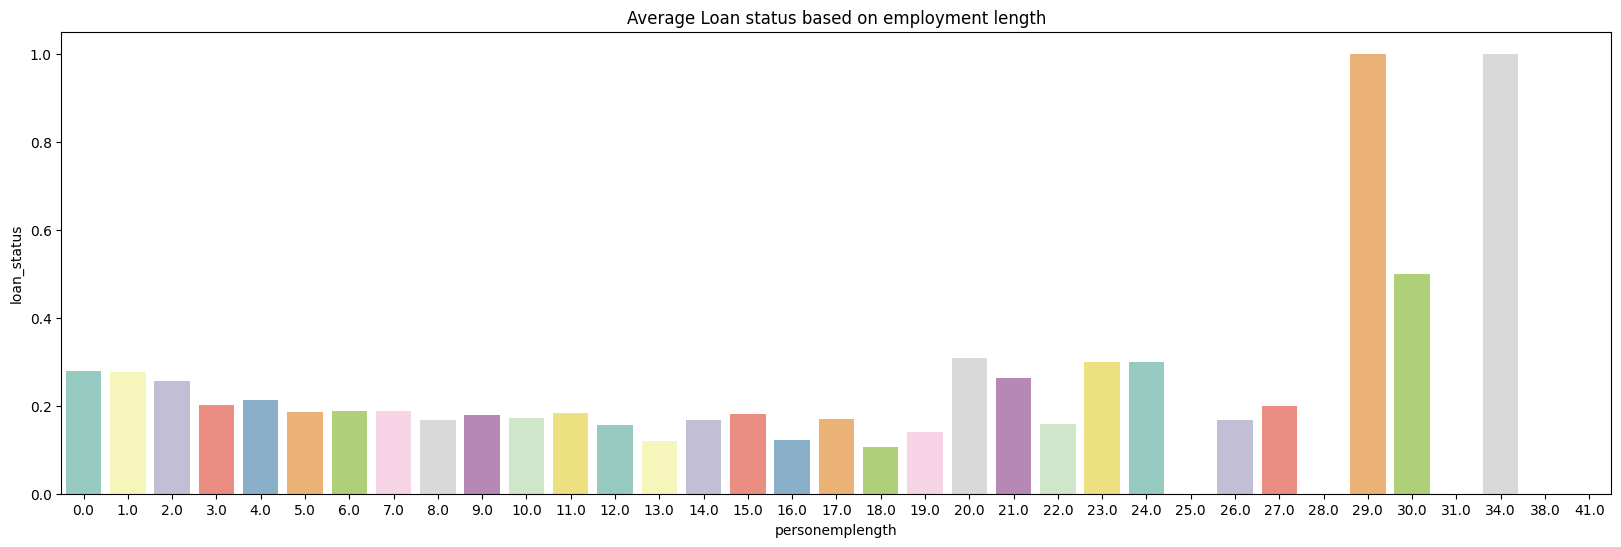

In [16]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df, x="personemplength", y="loan_status", ci=None, palette="Set3")
plt.title("Average Loan status based on employment length")
plt.show()


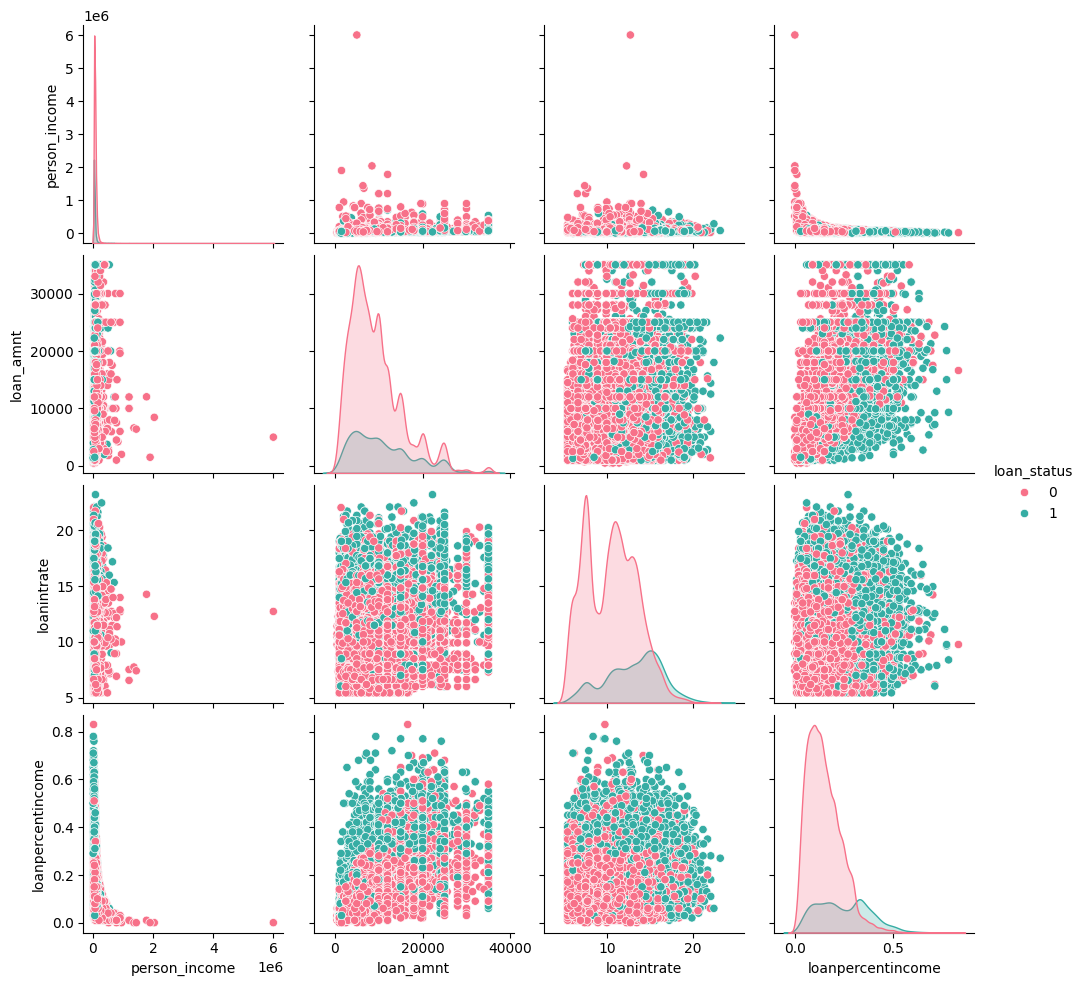

In [64]:
sns.pairplot(df[['person_income', 'loan_amnt', 'loanintrate', 'loanpercentincome', 'loan_status']], hue='loan_status', palette='husl')
plt.show()

In [20]:
average_interest_rate = df[df['loan_status'] == 0]['loanintrate'].mean()
print(f'Average loanintrate of Loan Status 0 : {average_interest_rate:.2f}')

Average loanintrate of Loan Status 0 : 10.46


In [21]:
df = df.drop(columns=['loanintrate'])

In [22]:
# categorical data
df = pd.get_dummies(df, drop_first=True)


X = df.drop('loan_status', axis=1)  
y = df['loan_status']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

results = {}

for name, model in models.items():
    if name in ["Logistic Regression", "SVM"]:  
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:  
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {"Accuracy": accuracy, "F1 Score": f1}

results_df = pd.DataFrame(results).T
print("Model Performance Benchmark:")
print(results_df)

Model Performance Benchmark:
                     Accuracy  F1 Score
Logistic Regression  0.874073  0.648768
Decision Tree        0.895692  0.757431
Random Forest        0.935774  0.826587
SVM                  0.873599  0.648838


In [24]:
df = pd.get_dummies(df, drop_first=True)

X = df.drop('loan_status', axis=1)  
y = df['loan_status']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.94
F1 Score: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      4991
           1       0.97      0.72      0.83      1346

    accuracy                           0.94      6337
   macro avg       0.95      0.86      0.89      6337
weighted avg       0.94      0.94      0.93      6337



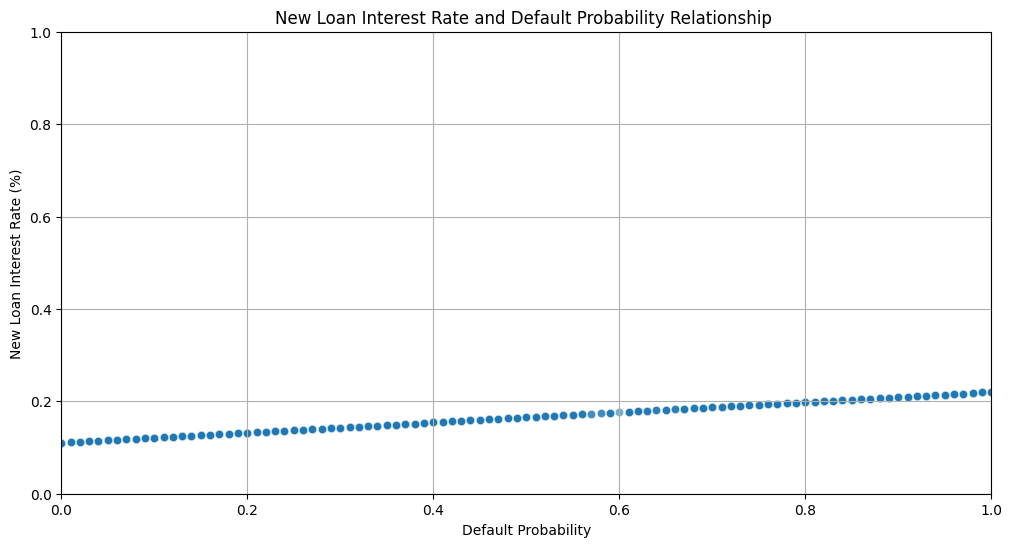

In [25]:
# default rate analysis
predicted_default_probability = model.predict_proba(X_test)[:, 1] 

base_interest_rate = 0.11011694892245036  # average interest rate 
risk_adjustment_factor = 0.11011694892245036  
new_interest_rate = base_interest_rate + (risk_adjustment_factor * predicted_default_probability)

result_df = pd.DataFrame({
    'predicted_default_probability': predicted_default_probability,
    'new_interest_rate_example': new_interest_rate
})

plt.figure(figsize=(12, 6))
sns.scatterplot(x='predicted_default_probability', y='new_interest_rate_example', data=result_df, alpha=0.6)
plt.title('New Loan Interest Rate and Default Probability Relationship ')
plt.xlabel('Default Probability')
plt.ylabel('New Loan Interest Rate (%)')
plt.xlim(0, 1)  
plt.ylim(0, 1)  
plt.grid(True)
plt.show()

In [14]:
import joblib

joblib.dump(model, 'loan_status_model.pkl')


['loan_status_model.pkl']